<a href="https://colab.research.google.com/github/funmeen/legendary-eureka/blob/main/Logistic_Regression_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("/content/Heart.csv")
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [ ]:
df = df.drop(columns = 'Unnamed: 0')
df['ChestPain'] = df['ChestPain'].astype('category')
df['ChestPain'] = df['ChestPain'].cat.codes
df['Thal'] = df['Thal'].astype('category')
df['Thal'] = df['Thal'].cat.codes
df['AHD'] = df['AHD'].astype('category')
df['AHD'] = df['AHD'].cat.codes
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2,1
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2,1
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,1,1


In [ ]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         0
AHD          0
dtype: int64

In [ ]:
df = df.dropna()
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,0,123,1,0.2,2,0.0,2,1
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2,1
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2,1
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2,1


In [ ]:
import matplotlib.pyplot as plt


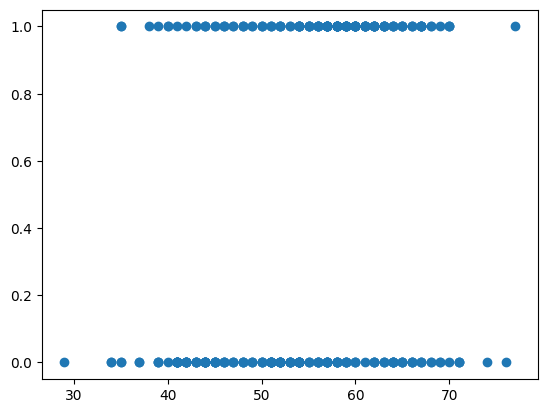

In [ ]:
plt.scatter(df.Age, df.AHD)

In [ ]:
import seaborn as sns

<Axes: xlabel='AHD', ylabel='count'>

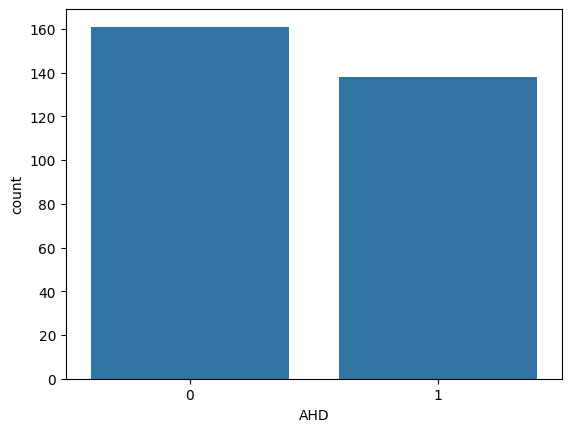

In [ ]:
sns.countplot(x = 'AHD', data=df)

In [ ]:
X = df.drop(columns = 'AHD')
Y = df['AHD']

In [ ]:
from sklearn.model_selection import train_test_split

Test size used is 30%
Train size used is 70%
Random State is 21

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 21)

In [ ]:
print("Training data X:", X_train)
print("Training labels y:", y_train)
print("Testing data X:", X_test)
print("Testing labels y:", y_test)

Training data X:      Age  Sex  ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
290   67    1          1     152   212    0        2    150      0      0.8   
264   61    1          0     138   166    0        2    125      1      3.6   
197   45    0          0     138   236    0        2    152      1      0.2   
77    51    0          1     140   308    0        2    142      0      1.5   
15    57    1          1     150   168    0        0    174      0      1.6   
..   ...  ...        ...     ...   ...  ...      ...    ...    ...      ...   
189   69    1          1     140   254    0        2    146      0      2.0   
120   48    1          0     130   256    1        2    150      1      0.0   
48    65    0          1     140   417    1        2    157      0      0.8   
262   60    0          3     150   240    0        0    171      0      0.9   
209   62    0          0     150   244    0        0    154      1      1.4   

     Slope   Ca  Thal  
290      2

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
classf_report = classification_report(y_test, y_pred)
print("Classification Report:", classf_report)

Classification Report:               precision    recall  f1-score   support

           0       0.80      0.96      0.87        46
           1       0.94      0.75      0.84        44

    accuracy                           0.86        90
   macro avg       0.87      0.85      0.85        90
weighted avg       0.87      0.86      0.85        90



In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", conf_matrix)

Confusion Matrix: [[44  2]
 [11 33]]


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = conf_matrix[1,1] / (conf_matrix[1,1] + conf_matrix[0,1])
recall = conf_matrix[1,1] / (conf_matrix[1,1] + conf_matrix[1,0])
f1_score = 2 * (precision * recall)/(precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

Accuracy: 0.8555555555555555
Precision: 0.9428571428571428
Recall: 0.75
F1-score: 0.8354430379746834


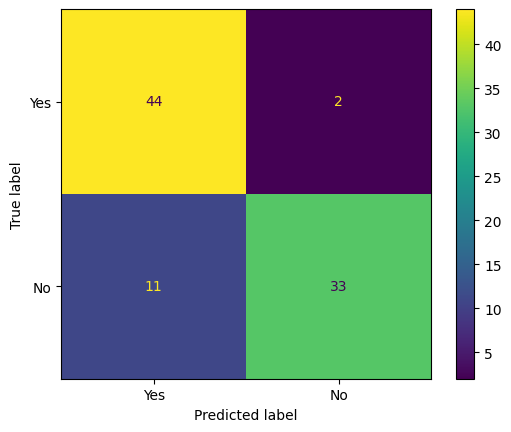

In [ ]:
labels = ["Yes", "No"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();